#Home work 3 for Data Analysis with Python <br>
#data set used: toyota.csv

In [313]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [314]:
import os

In [315]:
#Changing working directory
os.chdir(r'H:\EMK_Data analysis with python')

In [316]:
#Read 'csv' file
df = pd.read_csv('toyota.csv',encoding = 'unicode_escape')

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


#Here , <br>
model = Different model of toyota cars  <br>
year = Manufacturing time of cars  <br>
price = price of each cars of each model  <br>
transmission = how the cars were controlled
mileage = number of milles traveled  <br>
fuelType= type of fuel used in cars  <br>
mpg = traveled distance per gallon of fuel  <br>
engineSize= Size of engine  <br>




#2. EDA using groupby/pivot_table and barplot (total 9 barplots), based on model, transmission, and fuelType


#Here, groupby function is used for data analysis

In [317]:
#To check unique value in 'model' column

print(df['model'].unique())

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


In [318]:
#data aggregation by 'Model' column

df_agg = df.groupby(['model'])['price'].agg(['count', 'mean', 'sum'])

display(df_agg)


,count,mean,sum
model,,,
Auris,712,12507.911517,8905633
Avensis,115,9884.356522,1136701
Aygo,1961,7905.414584,15502518
C-HR,479,20651.540710,9892088
Camry,11,26910.090909,296011
Corolla,267,20942.734082,5591710
GT86,73,19908.849315,1453346
Hilux,86,21504.593023,1849395
IQ,8,4247.250000,33978


#Pre-processing before data analysis

In [319]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


#Findings of data aggregation based on model column of toyota cars:

#A. What are the top 5 selling car models in the dataset? <br>
# Ans: Yanis, Aygo, Auris, C-HR, RAV4 <br>

#B. What's the average selling price of the top 5 selling car models? <br>
# Ans: 10553.08 , 7905.41 , 12507.91 , 20651.54 and 18161.06 $.


#C. What's the total sale of the top 5 selling car models? <br>
# Ans: 22.39, 15.50, 8.91, 8.89 and 8.59 million $.

#Barplot based on 'Model' column

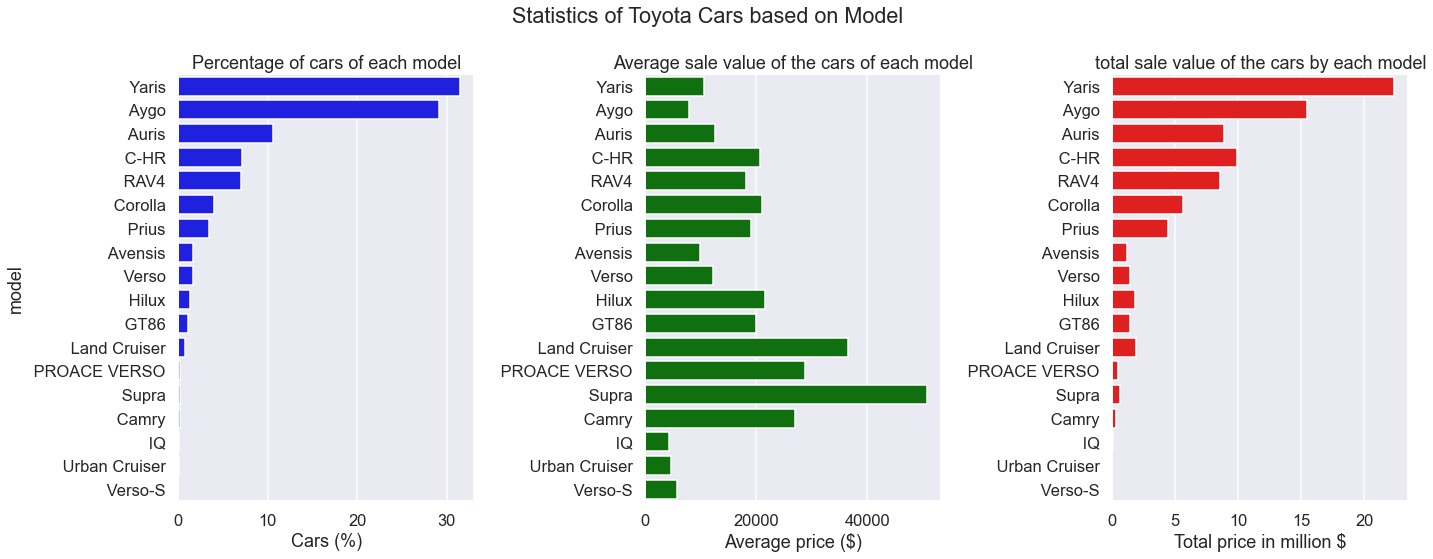

In [320]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars of each model")
plt.xlabel("Cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Average sale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("total sale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Statistics of Toyota Cars based on Model")
plt.tight_layout()
plt.show()

#Bar plot based on 'tarnsmission' column

In [321]:
# Data aggregation For 'transmission' column

df_agg = df.groupby(['transmission'])['price'].agg(['count', 'mean', 'sum'])

display(df_agg)


,count,mean,sum
transmission,,,
Automatic,2657,16582.828754,44060576
Manual,3826,9551.496864,36544027
Other,1,12795.000000,12795
Semi-Auto,254,14797.137795,3758473


In [322]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
#df_agg = df_agg.drop('count', axis=1)

display(df_agg.head(10))

,count,mean,sum,percent_of_cars
transmission,,,,
Manual,3826,9551.50,36.54,56.78
Automatic,2657,16582.83,44.06,39.43
Semi-Auto,254,14797.14,3.76,3.77
Other,1,12795.00,0.01,0.01


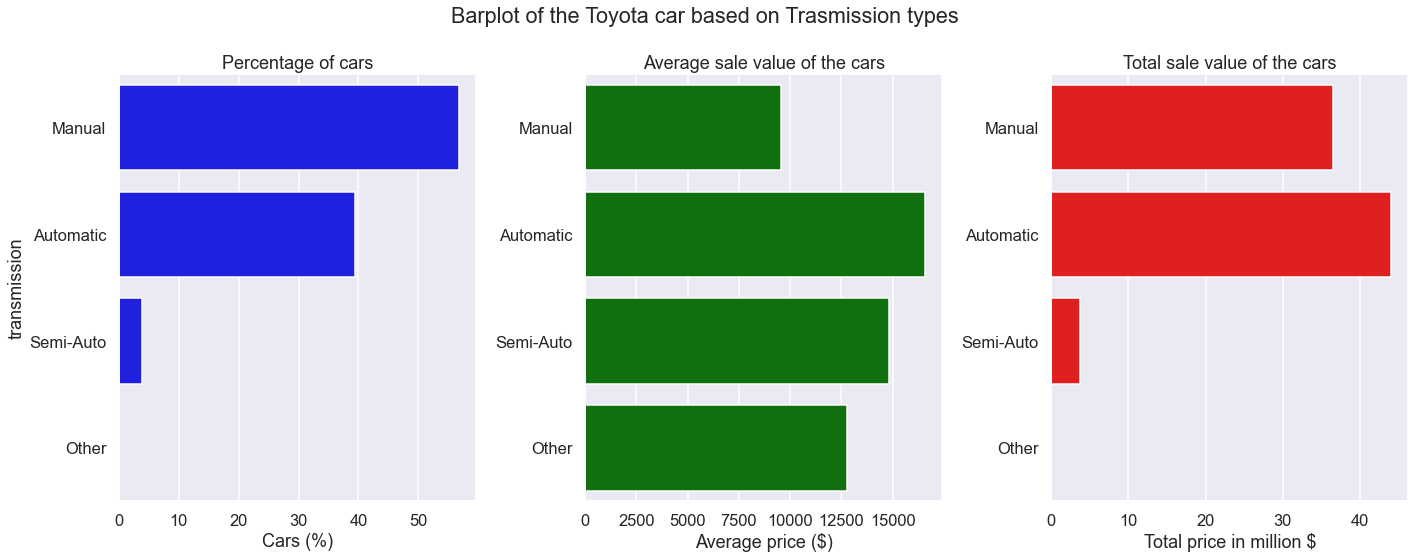

In [323]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars")
plt.xlabel("Cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Average sale value of the cars")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("Total sale value of the cars")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota car based on Trasmission types ")
plt.tight_layout()
plt.show()

In [324]:
#Bar plot based on 'FuelType' column

In [325]:

df_agg = df.groupby(['fuelType'])['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
fuelType,,,
Diesel,503,15697.807157,7895997
Hybrid,2043,17185.472834,35109921
Other,105,14121.161905,1482722
Petrol,4087,9759.537803,39887231


In [326]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
#df_agg = df_agg.drop('count', axis=1)

display(df_agg.head(10))

,count,mean,sum,percent_of_cars
fuelType,,,,
Petrol,4087,9759.54,39.89,60.66
Hybrid,2043,17185.47,35.11,30.32
Diesel,503,15697.81,7.90,7.47
Other,105,14121.16,1.48,1.56


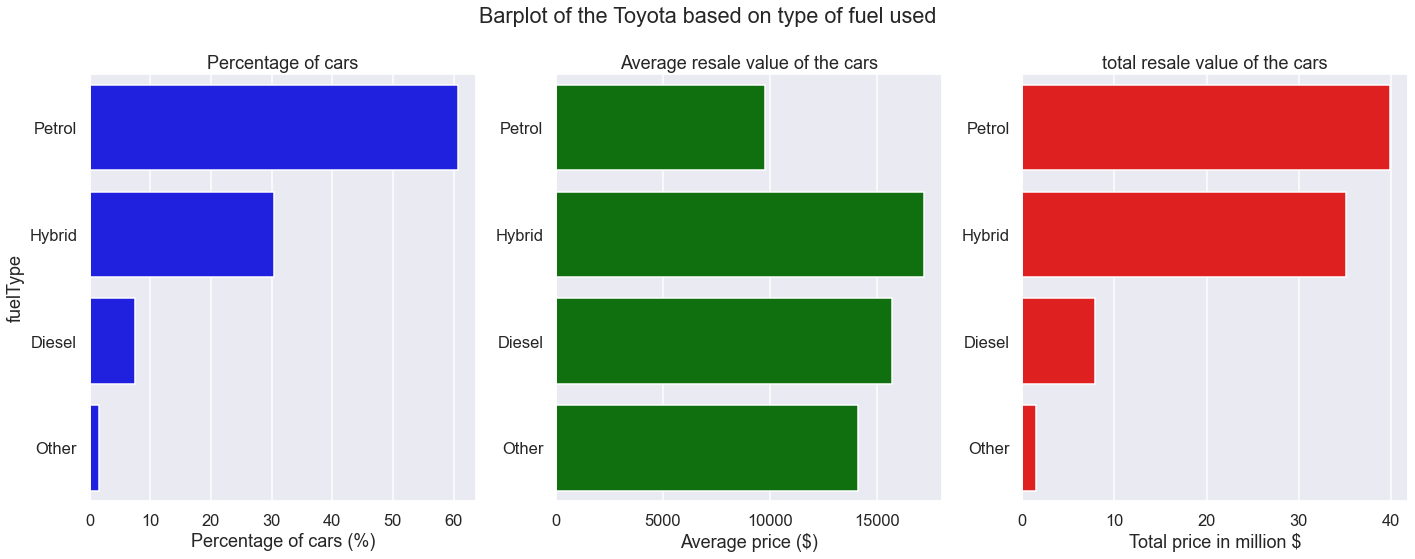

In [327]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Average resale value of the cars")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("total resale value of the cars")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota based on type of fuel used")
plt.tight_layout()
plt.show()